# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = "/content/drive/MyDrive/submission/Dataset_clustering.csv" # Update with the correct path in your Drive
df = pd.read_csv(file_path)
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,2.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,2.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,2.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Memisahkan fitur dan target
X = df.drop(columns=["Cluster"])  # Semua fitur kecuali target
y = df["Cluster"]  # Target klasifikasi

# Mengubah fitur kategorikal menjadi numerik menggunakan one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Data Splitting (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Mengonversi target menjadi integer
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [10]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)  # Melatih model


RandomForestClassifier(random_state=42)

In [11]:
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train_encoded)  # Melatih model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Algoritma yang saya gunakan yaitu:  
- **1. Random Forest:** Algoritma ensemble berbasis pohon keputusan yang bekerja dengan membangun banyak pohon keputusan (*decision trees*) selama pelatihan dan menggabungkan hasilnya untuk meningkatkan akurasi serta mengurangi overfitting.  
- **Keunggulan Random Forest:**  
  - **Robust terhadap overfitting**, karena menggunakan banyak pohon yang mengurangi variabilitas.  
  - **Mampu menangani dataset dengan fitur kategorikal dan numerik** tanpa perlu banyak preprocessing.  
  - **Bekerja dengan baik pada dataset yang memiliki banyak fitur**, karena hanya sebagian fitur dipilih secara acak untuk setiap pohon.  
  - **Dapat menangani missing values** dengan baik, sehingga tidak selalu perlu melakukan imputasi sebelum melatih model.  
  - **Mendukung parallel computing**, sehingga proses pelatihannya lebih cepat dibandingkan metode berbasis pohon lainnya.  

- **2. XGBoost (Extreme Gradient Boosting):**  
  Algoritma boosting berbasis pohon keputusan yang sangat cepat dan dioptimalkan untuk menangani data dalam jumlah besar serta meningkatkan akurasi dengan cara mengurangi kesalahan secara iteratif.  

- **Keunggulan XGBoost:**  
  - **Memiliki akurasi tinggi**, karena menggunakan pendekatan boosting yang terus memperbaiki kesalahan dari model sebelumnya.  
  - **Lebih cepat dibandingkan metode boosting lainnya**, karena memanfaatkan pemrosesan paralel.  
  - **Mencegah overfitting** dengan regularisasi L1 dan L2, sehingga model tetap generalisasi dengan baik.  
  - **Dapat menangani missing values secara otomatis**, sehingga lebih fleksibel dibandingkan model lain.  
  - **Cocok untuk dataset skala besar**, karena mengoptimalkan penggunaan memori dan waktu komputasi.



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
# Melakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)  # Prediksi dengan Random Forest
y_pred_xgb = xgb_model.predict(X_test)  # Prediksi dengan XGBoost

In [13]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    print(f"📊 Evaluasi Model: {model_name}")
    print(f"- Accuracy  : {accuracy:.4f}")
    print(f"- Precision : {precision:.4f}")
    print(f"- Recall    : {recall:.4f}")
    print(f"- F1-Score  : {f1:.4f}")
    print("-" * 40)

# Evaluasi untuk Random Forest
evaluate_model(y_test_encoded, y_pred_rf, "Random Forest")

# Evaluasi untuk XGBoost
evaluate_model(y_test_encoded, y_pred_xgb, "XGBoost")


📊 Evaluasi Model: Random Forest
- Accuracy  : 0.9971
- Precision : 0.9972
- Recall    : 0.9971
- F1-Score  : 0.9971
----------------------------------------
📊 Evaluasi Model: XGBoost
- Accuracy  : 0.9990
- Precision : 0.9991
- Recall    : 0.9990
- F1-Score  : 0.9990
----------------------------------------


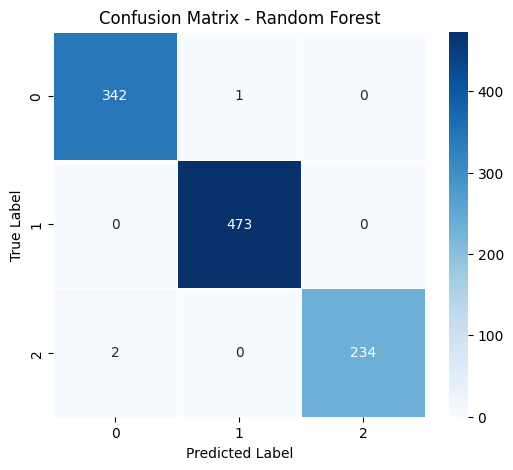

In [14]:
# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)

# Plot Confusion Matrix untuk Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

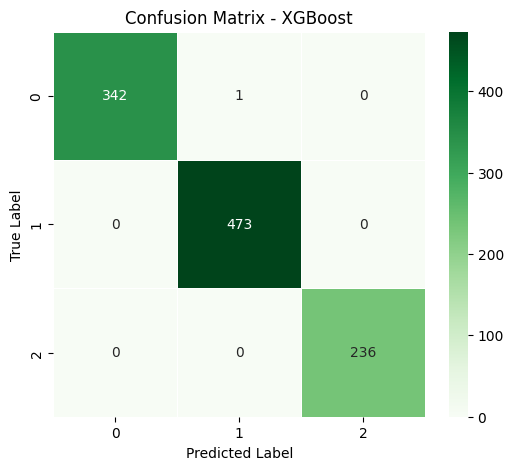

In [15]:
# Membuat confusion matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Plot Confusion Matrix untuk XGBoost
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

# **Hasil Evaluasi dan Perbandingan Algoritma Klasifikasi**

## **1️⃣ Akurasi (Accuracy)**
- **XGBoost memiliki akurasi lebih tinggi (99.90%) dibandingkan Random Forest (99.71%).**  
- Dengan perbedaan yang sangat kecil, **keduanya termasuk dalam kategori model dengan performa tinggi**.  

## **2️⃣ Presisi (Precision)**
- **XGBoost memiliki precision yang lebih tinggi (99.91%)**, yang berarti lebih sedikit *false positives* dibandingkan Random Forest.  
- Ini menunjukkan bahwa **XGBoost lebih baik dalam memastikan prediksi positif benar-benar termasuk dalam kelas positif**.  

## **3️⃣ Recall**
- **Recall XGBoost (99.90%) lebih tinggi dibandingkan Random Forest (99.71%)**, yang berarti model ini lebih baik dalam mengidentifikasi seluruh kasus positif.  
- **Semakin tinggi Recall, semakin sedikit data positif yang salah diklasifikasikan sebagai negatif**.  

## **4️⃣ F1-Score**
- **F1-Score XGBoost lebih tinggi (99.90%) dibandingkan Random Forest (99.71%)**.  
- Ini menunjukkan bahwa **keseimbangan antara Precision dan Recall pada XGBoost lebih baik dibandingkan Random Forest**.  

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---

## **2. Identifikasi Kelemahan Model**  

### **a) Precision atau Recall Rendah untuk Kelas Tertentu**  
- Dengan **Precision dan Recall di atas 99% untuk kedua model**, **tidak ada indikasi kelemahan signifikan** dalam klasifikasi kelas tertentu.  
- **Namun, untuk analisis lebih dalam, bisa diperiksa Confusion Matrix untuk melihat apakah ada kelas dengan tingkat kesalahan prediksi lebih tinggi.**  
- Jika ada **kelas yang sering tertukar**, maka perlu dilakukan analisis lebih lanjut terhadap fitur yang digunakan untuk membedakan kelas tersebut.    

### **b) Apakah Model Mengalami Overfitting atau Underfitting?**  
- **Model memiliki akurasi yang sangat tinggi**, sehingga **tidak menunjukkan tanda-tanda underfitting.**  

#### **Cara Memeriksa Overfitting:**  
- **Bandingkan akurasi di training set vs testing set.**  
  - Jika **perbedaannya signifikan**, maka model **overfit** dan terlalu menyesuaikan diri dengan data training.  
- **Cek apakah akurasi training mendekati 100% tetapi testing lebih rendah (~<99%).**  
  - Jika iya, maka model terlalu "mengingat" data training dan **tidak dapat menggeneralisasi dengan baik ke data baru.**  

---

## **3. Rekomendasi Tindakan Lanjutan**  

🔹 **Untuk hasilnya sudah sangat memuaskan, namun jika ingin meningkatkan performa lebih lanjut, beberapa langkah yang bisa dilakukan:**  

### **Lakukan Hyperparameter Tuning**  
- **Gunakan Grid Search atau Random Search** untuk menemukan kombinasi parameter terbaik.  
- **Bayesian Optimization** untuk tuning yang lebih cepat dan optimal.  

### **Coba Model Ensembel**  
- **Kombinasikan Random Forest dan XGBoost** menggunakan **Voting Classifier** untuk melihat apakah gabungan model dapat meningkatkan performa.  

### **Eksperimen dengan Model Lain**  
- Jika ingin **model yang lebih interpretatif**, bisa menggunakan **Logistic Regression atau Decision Tree** untuk membandingkan hasilnya.  


**Dengan langkah-langkah ini, model dapat semakin dioptimalkan agar lebih robust dan akurat!**